In [237]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
import os

In [238]:
def load_landmark_list(filename):
    # Read the serialized data from the file
    with open(filename, "rb") as file:
        serialized_data = file.read()

    # Deserialize the data into a NormalizedLandmarkList object
    normalized_landmark_list = landmark_pb2.NormalizedLandmarkList()
    normalized_landmark_list.ParseFromString(serialized_data)

    return normalized_landmark_list

In [239]:
landmarks_folder = f"training/landmarks/"

In [240]:
landmark_list = load_landmark_list(os.path.join(landmarks_folder, "stand", "stand_1692099300.pb"))
landmark_list = landmark_list.landmark
landmark_list

[x: 0.4750522
y: 0.20307502
z: -0.3134667
visibility: 0.99975574
, x: 0.48073882
y: 0.18814713
z: -0.29747063
visibility: 0.9995756
, x: 0.4842968
y: 0.188562
z: -0.29753354
visibility: 0.9995761
, x: 0.48740354
y: 0.18917695
z: -0.2975257
visibility: 0.9995832
, x: 0.4700288
y: 0.1880081
z: -0.2967674
visibility: 0.9995652
, x: 0.46660572
y: 0.18827184
z: -0.2967671
visibility: 0.99956703
, x: 0.46332374
y: 0.18882029
z: -0.2967433
visibility: 0.9995872
, x: 0.491326
y: 0.19829635
z: -0.18603565
visibility: 0.99929374
, x: 0.45912933
y: 0.1963901
z: -0.18207397
visibility: 0.9993828
, x: 0.4817802
y: 0.21931557
z: -0.27045193
visibility: 0.99966204
, x: 0.46880126
y: 0.21785492
z: -0.2694581
visibility: 0.9996765
, x: 0.5206879
y: 0.30290607
z: -0.10716871
visibility: 0.9998007
, x: 0.42678007
y: 0.30332285
z: -0.098852225
visibility: 0.99972034
, x: 0.5328618
y: 0.42464387
z: -0.07619977
visibility: 0.97970325
, x: 0.41304278
y: 0.43208635
z: -0.06335667
visibility: 0.9757525
, x: 0.

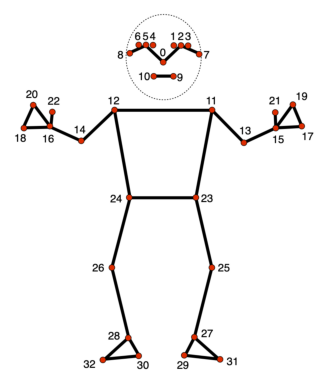

In [21]:
landmarks_pic = cv2.imread('./documentation/pose_landmarks_index.png')
landmarks_pic = cv2.cvtColor(landmarks_pic, cv2.COLOR_BGR2RGB)

plt.imshow(landmarks_pic)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

Omit following landmarks (face, fingers, feet):

~~0 - nose~~<br>
~~1 - left eye~~<br>
~~2 - left eye~~<br>
~~3 - left eye~~<br>
~~4 - right eye~~<br>
~~5 - right eye~~<br>
~~6 - right eye~~<br>
~~7 - left ear~~<br>
~~8 - right ear~~<br>
~~9 - mouth (left)~~<br>
~~10 - mouth (right)~~<br>
11 - left shoulder<br>
12 - right shoulder<br>
13 - left elbow<br>
14 - right elbow<br>
15 - left wrist<br>
16 - right wrist<br>
~~17 - left pinky~~<br>
~~18 - right pinky~~<br>
~~19 - left index~~<br>
~~20 - right index~~<br>
~~21 - left thumb~~<br>
~~22 - right thumb~~<br>
23 - left hip<br>
24 - right hip<br>
25 - left knee<br>
26 - right knee<br>
27 - left ankle<br>
28 - right ankle<br>
~~29 - left heel~~<br>
~~30 - right heel~~<br>
~~31 - left foot index~~<br>
~~32 - right foot index~~<br>

In [236]:
landmark_list[0]

TypeError: 'NormalizedLandmarkList' object is not subscriptable

In [28]:
test_list = [i for i in range(33)]

In [35]:
test_list[11:17]+test_list[23:29]

[11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28]

In [75]:
filtered_landmark_list = landmark_list[11:17]+landmark_list[23:29]
len(filtered_landmark_list)
# -> 12 landmarks left!

12

In [82]:
filtered_landmark_list[0].x

0.5206878781318665

In [243]:
coordinate_array = []

for landmark in filtered_landmark_list:
    x = landmark.x
    y = landmark.y
    #z = landmark.z
    coordinate_array.append([x, y])

In [244]:
coordinate_array

[[0.5636271834373474, 0.32091668248176575],
 [0.4760778844356537, 0.31832680106163025],
 [0.6213632822036743, 0.26804977655410767],
 [0.4189164638519287, 0.2716871500015259],
 [0.6696368455886841, 0.1967540681362152],
 [0.3628787398338318, 0.1949465423822403],
 [0.5427805185317993, 0.5801335573196411],
 [0.4902142882347107, 0.5734682679176331],
 [0.5751279592514038, 0.7357802391052246],
 [0.4551185071468353, 0.7330253720283508],
 [0.6019293069839478, 0.8821603655815125],
 [0.4230709671974182, 0.8840221166610718]]

In [88]:
coordinate_array = np.array(coordinate_array)

In [245]:
coordinate_array

[[0.5636271834373474, 0.32091668248176575],
 [0.4760778844356537, 0.31832680106163025],
 [0.6213632822036743, 0.26804977655410767],
 [0.4189164638519287, 0.2716871500015259],
 [0.6696368455886841, 0.1967540681362152],
 [0.3628787398338318, 0.1949465423822403],
 [0.5427805185317993, 0.5801335573196411],
 [0.4902142882347107, 0.5734682679176331],
 [0.5751279592514038, 0.7357802391052246],
 [0.4551185071468353, 0.7330253720283508],
 [0.6019293069839478, 0.8821603655815125],
 [0.4230709671974182, 0.8840221166610718]]

In [248]:
perturbed_coordinates

array([[0.59359706, 0.28367751],
       [0.49426663, 0.36066299],
       [0.65150766, 0.26416624],
       [0.45780876, 0.25405128],
       [0.72093932, 0.16413217],
       [0.33357743, 0.21514786],
       [0.56727718, 0.55393343],
       [0.47286377, 0.52416985],
       [0.57407901, 0.73367319],
       [0.42362243, 0.69118069],
       [0.6512864 , 0.89800878],
       [0.46177183, 0.88679775]])

In [234]:
def perturbate_coordinates(coordinates, translation_range=0.05, noise_std=0.01):
    perturbed_coordinates = []
    for coord in coordinates:
        # Translate the coordinates
        translation = np.random.uniform(-translation_range, translation_range, size=2)
        translated_coord = coord + translation
        
        # Add noise to the translated coordinates
        noise = np.random.normal(0, noise_std, size=2)
        perturbed_coord = translated_coord + noise
        
        perturbed_coordinates.append(perturbed_coord)
    
    return np.array(perturbed_coordinates)


In [246]:
perturbed_coordinates = perturbate_coordinates(coordinate_array)

In [ ]:
# Example usage
original_coordinates = np.array([[x1, y1], [x2, y2], ...])  # Replace with your coordinate data
perturbed_coordinates = perturbate_coordinates(original_coordinates)

In [91]:
DATA_PATH = "./training/landmarks"

In [93]:
poses = np.array([i for i in sorted(os.listdir(DATA_PATH)) if i != ".DS_Store"])

In [94]:
poses

array(['X', 'crane', 'squat', 'stand'], dtype='<U5')

In [109]:
# label dict (encoded)

label_list = [label for label in os.listdir(DATA_PATH) if label != '.DS_Store']

label_mapping = {}

for code, label in enumerate(sorted(label_list)):
        label_mapping[label] = code
        
label_mapping
        
    

{'X': 0, 'crane': 1, 'squat': 2, 'stand': 3}

In [119]:
landmarks_folder = "./training/landmarks"

In [140]:
X = []  # Initialize X for landmark data
y = []  # Initialize y for labels

In [141]:
type(y)

list

In [164]:
X = []  # Initialize X for landmark data
y = []  # Initialize y for labels

for pose_folder in os.listdir(landmarks_folder):
    pose_label = label_mapping.get(pose_folder)
    if pose_label is not None:
        pose_folder_path = os.path.join(landmarks_folder, pose_folder)
        
        for entry_filename in os.listdir(pose_folder_path):
            if entry_filename.endswith('.pb'):  
                landmark_list = load_landmark_list(os.path.join(pose_folder_path, entry_filename))
                filtered_landmark_list = landmark_list.landmark[11:17] + landmark_list.landmark[23:29]
                
                coordinate_array = []
                for landmark in filtered_landmark_list:
                    x = landmark.x
                    y_ = landmark.y
                    #z = landmark.z
                    coordinate_array.append([x, y_])
                    
                X.append(coordinate_array)
                y.append(pose_label)

X = np.array(X)
y = np.array(y)

In [124]:
os.path.join(landmarks_folder, os.listdir(landmarks_folder)[1])

'./training/landmarks/squat'

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 158, 64)           1600      
                                                                 
 dense_1 (Dense)             (None, 158, 32)           2080      
                                                                 
 dense_2 (Dense)             (None, 158, 10)           330       
                                                                 
Total params: 4010 (15.66 KB)
Trainable params: 4010 (15.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [165]:
X = np.array(X)
X.shape

(158, 12, 2)

In [103]:
sorted(label_list)

['X', 'crane', 'squat', 'stand']

In [97]:
sorted(os.listdir(DATA_PATH)) if i != ".DS_Store"

SyntaxError: expected 'else' after 'if' expression (499076930.py, line 1)

In [161]:
y.shape

(158,)

In [167]:
# Reshape the X array to 2D
num_samples, num_landmarks, num_dimensions = X.shape
X_reshaped = X.reshape(num_samples, num_landmarks * num_dimensions)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on your reshaped data and transform X
X_standardized = scaler.fit_transform(X_reshaped)


In [201]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [180]:


callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

In [202]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [192]:
X_standardized.shape, y_train.shape

((158, 24), (126,))

In [193]:
X_standardized.shape[1]

24

In [191]:
X_train.shape

(126, 24)

In [194]:
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Create a sequential model
model = tf.keras.Sequential()

# Add layers to the model
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_standardized.shape[1],)))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                1600      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 4)                 132       
                                                                 
Total params: 3812 (14.89 KB)
Trainable params: 3812 (14.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [204]:
X_train.shape, y_train.shape

((126, 24), (126, 4))

In [205]:
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [207]:
import tensorflow as tf

# Define a function without @tf.function
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_standardized.shape[1],)))
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
    return model

# Create the model outside of @tf.function
model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1600      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 4)                 132       
                                                                 
Total params: 3812 (14.89 KB)
Trainable params: 3812 (14.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 1s 112ms/step - loss: 1.5338 - accuracy: 0.2143 - val_loss: 1.4098 - val_accuracy: 0.1875
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 1.3353 - accuracy: 0.2619 - val_loss: 1.2262 - val_accuracy: 0.2188
Epoch

In [208]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [210]:
# Create a DataFrame to store the metrics data
import pandas as pd

epochs = range(1, len(train_accuracy) + 1)
df_metrics = pd.DataFrame({'Epoch': epochs,
                           'Training Accuracy': train_accuracy,
                           'Validation Accuracy': val_accuracy,
                           'Training Loss': train_loss,
                           'Validation Loss': val_loss})

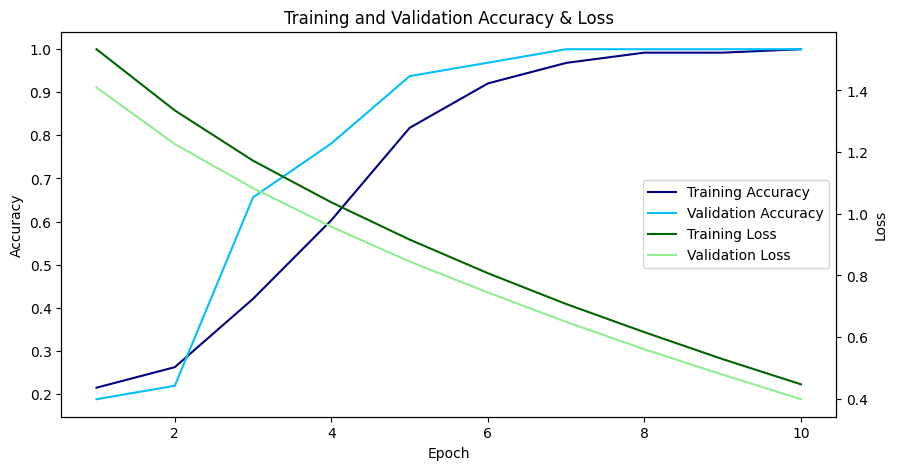

In [214]:
import seaborn as sns

# Plot the training and validation accuracy with light and dark blue
plt.figure(figsize=(10, 5))

# First y-axis for Accuracy 
ax1 = sns.lineplot(x='Epoch', y='Training Accuracy', data=df_metrics, color='navy', label='Training Accuracy')
ax1 = sns.lineplot(x='Epoch', y='Validation Accuracy', data=df_metrics, color='deepskyblue', label='Validation Accuracy')

# Second y-axis for Loss
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Epoch', y='Training Loss', data=df_metrics, color='darkgreen', label='Training Loss', legend=False)
ax2 = sns.lineplot(x='Epoch', y='Validation Loss', data=df_metrics, color='lightgreen', label='Validation Loss', legend=False)

# Set labels for y-axes
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

# Set legends for the lines plotted on each axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='center right')

plt.grid(False)

plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epoch')

plt.savefig('./figures/new_1.png')
plt.show()

In [216]:
model.save('./models/model_1.h5')

/Users/alexanderschenk/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [220]:
# Define a custom callback to stop training if validation loss stops decreasing
class EarlyStoppingLoss(tf.keras.callbacks.Callback):
    def __init__(self, patience=5, min_delta=1e-4):
        super(EarlyStoppingLoss, self).__init__()
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('val_loss')
        if current_loss is None:
            return

        if current_loss + self.min_delta < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True

# Create an instance of the custom callback
early_stopping = EarlyStoppingLoss(patience=5, min_delta=0.05)

In [221]:
# Create the model outside of @tf.function
model_2 = create_model()

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                1600      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 4)                 132       
                                                                 
Total params: 3812 (14.89 KB)
Trainable params: 3812 (14.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [222]:
# Train the model with the custom callback
batch_size = 32
epochs = 100
history_2 = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
4/4 [==============================] - 1s 66ms/step - loss: 1.2818 - accuracy: 0.4048 - val_loss: 1.0818 - val_accuracy: 0.4375
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0343 - accuracy: 0.6349 - val_loss: 0.8728 - val_accuracy: 0.8438
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8475 - accuracy: 0.8968 - val_loss: 0.6986 - val_accuracy: 0.9062
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6883 - accuracy: 0.9524 - val_loss: 0.5610 - val_accuracy: 0.9375
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5629 - accuracy: 0.9762 - val_loss: 0.4522 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4595 - accuracy: 0.9762 - val_loss: 0.3656 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.3757 - accuracy: 0.9841 - val_loss: 0.2975 - val_accuracy: 1.0000
Epoch 8/100
4/4 [====

In [229]:
train_accuracy_2 = history_2.history['accuracy']
train_loss_2 = history_2.history['loss']
val_accuracy_2 = history_2.history['val_accuracy']
val_loss_2 = history_2.history['val_loss']

In [231]:
# Create a DataFrame to store the metrics data
import pandas as pd

epochs = range(1, len(train_accuracy_2) + 1)
df_metrics_2 = pd.DataFrame({'Epoch': epochs,
                           'Training Accuracy': train_accuracy_2,
                           'Validation Accuracy': val_accuracy_2,
                           'Training Loss': train_loss_2,
                           'Validation Loss': val_loss_2})

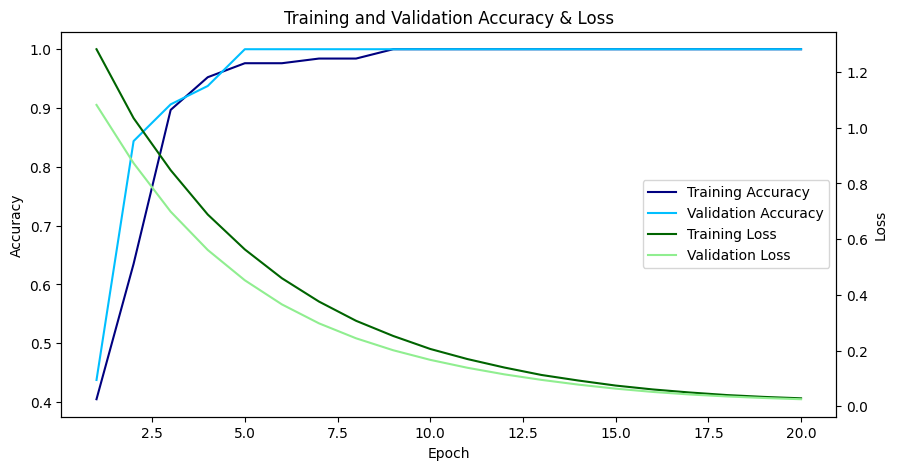

In [233]:
# Plot the training and validation accuracy with light and dark blue
plt.figure(figsize=(10, 5))

# First y-axis for Accuracy 
ax1 = sns.lineplot(x='Epoch', y='Training Accuracy', data=df_metrics_2, color='navy', label='Training Accuracy')
ax1 = sns.lineplot(x='Epoch', y='Validation Accuracy', data=df_metrics_2, color='deepskyblue', label='Validation Accuracy')

# Second y-axis for Loss
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Epoch', y='Training Loss', data=df_metrics_2, color='darkgreen', label='Training Loss', legend=False)
ax2 = sns.lineplot(x='Epoch', y='Validation Loss', data=df_metrics_2, color='lightgreen', label='Validation Loss', legend=False)

# Set labels for y-axes
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

# Set legends for the lines plotted on each axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='center right')

plt.grid(False)

plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epoch')

plt.savefig('./figures/accuracy_loss_plot_model_2.png')
plt.show()